In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Wipro_new_data.csv")
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month-Year,Adjustments On Amalgamation Merger Demerger Others,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
0,3/1/2005,78.750000,78.750000,75.723755,76.010628,63.149345,4228995,5-Mar,3/1/2005,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
1,3/2/2005,76.500000,76.837502,74.925003,75.498756,62.724075,4751626,5-Mar,3/1/2005,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2,3/3/2005,75.487503,78.975006,75.487503,78.361877,65.102753,6326453,5-Mar,3/1/2005,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
3,3/4/2005,78.778130,81.450005,78.412506,81.005630,67.299171,10070595,5-Mar,3/1/2005,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
4,3/7/2005,81.112503,81.669380,80.128128,81.208130,67.467407,3415475,5-Mar,3/1/2005,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,12/22/2023,435.299988,466.299988,434.000000,462.649994,461.665405,23040407,23-Mar,12/1/2023,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
4645,12/26/2023,454.000000,475.799988,448.350006,470.100006,469.099579,27314322,23-Mar,12/1/2023,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
4646,12/27/2023,468.500000,475.399994,464.100006,470.950012,469.947784,12631496,23-Mar,12/1/2023,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
4647,12/28/2023,472.549988,477.399994,467.649994,469.450012,468.450958,8419978,23-Mar,12/1/2023,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_close = data['Close']
data = data.drop(columns=['Year', 'Month-Year', 'High', 'Adj Close','Open'])
data

,Low,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-01,75.723755,76.010628,4228995,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-02,74.925003,75.498756,4751626,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-03,75.487503,78.361877,6326453,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-04,78.412506,81.005630,10070595,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-07,80.128128,81.208130,3415475,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,434.000000,462.649994,23040407,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
2023-12-26,448.350006,470.100006,27314322,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
2023-12-27,464.100006,470.950012,12631496,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0


In [4]:

data
#scaler = MinMaxScaler()
#data_scaled = scaler.fit_transform(data)
#data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

,Low,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-01,75.723755,76.010628,4228995,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-02,74.925003,75.498756,4751626,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-03,75.487503,78.361877,6326453,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-04,78.412506,81.005630,10070595,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
2005-03-07,80.128128,81.208130,3415475,0.0,108.10,21.25,138.51,69.54,69.54,0.0,...,1788.53,0.01,4052.27,8.4,4751.73,140.71,4892.44,323.98,1406.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,434.000000,462.649994,23040407,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
2023-12-26,448.350006,470.100006,27314322,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0
2023-12-27,464.100006,470.950012,12631496,0.0,0.82,16.75,1094.34,114.36,114.36,0.0,...,18842.80,0.08,31329.80,3702.5,61101.50,1097.60,62762.30,5300.20,13273.20,0


In [5]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Close']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1], index=data.index)
print(len(data_scaled))

scaler_close = MinMaxScaler()
close_scaled = scaler_close.fit_transform(data[['Close']])
close_scaled

data_scaled['Close'] = close_scaled
data_scaled

4649


,Low,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Assets,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-01,0.052018,0.045554,0.0,0.979378,0.409742,0.000000,0.166587,0.166587,0.0,0.000000,...,0.000000,0.000000,0.0,0.000820,0.0,0.00000,0.0,0.056553,0.0,0.0
2005-03-02,0.050836,0.044797,0.0,0.979378,0.409742,0.000000,0.166587,0.166587,0.0,0.000000,...,0.000000,0.000000,0.0,0.000820,0.0,0.00000,0.0,0.056553,0.0,0.0
2005-03-03,0.051669,0.049031,0.0,0.979378,0.409742,0.000000,0.166587,0.166587,0.0,0.000000,...,0.000000,0.000000,0.0,0.000820,0.0,0.00000,0.0,0.056553,0.0,0.0
2005-03-04,0.055999,0.052940,0.0,0.979378,0.409742,0.000000,0.166587,0.166587,0.0,0.000000,...,0.000000,0.000000,0.0,0.000820,0.0,0.00000,0.0,0.056553,0.0,0.0
2005-03-07,0.058539,0.053239,0.0,0.979378,0.409742,0.000000,0.166587,0.166587,0.0,0.000000,...,0.000000,0.000000,0.0,0.000820,0.0,0.00000,0.0,0.056553,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.582476,0.617254,0.0,0.000456,0.194842,0.896079,0.471216,0.471216,0.0,0.189835,...,0.797481,0.179487,1.0,0.968589,1.0,0.89757,1.0,0.925185,1.0,0.0
2023-12-26,0.603722,0.628270,0.0,0.000456,0.194842,0.896079,0.471216,0.471216,0.0,0.189835,...,0.797481,0.179487,1.0,0.968589,1.0,0.89757,1.0,0.925185,1.0,0.0
2023-12-27,0.627041,0.629527,0.0,0.000456,0.194842,0.896079,0.471216,0.471216,0.0,0.189835,...,0.797481,0.179487,1.0,0.968589,1.0,0.89757,1.0,0.925185,1.0,0.0


In [6]:
# Check data types and missing values
print(data_scaled.dtypes)
print(data_scaled.isnull().sum())

Low                                                   float64
Close                                                 float64
Volume                                                float64
Adjustments On Amalgamation Merger Demerger Others    float64
Asset Turnover Ratio (%)                              float64
                                                       ...   
Total Reserves and Surplus                            float64
Total Share Capital                                   float64
Total Shareholders Funds                              float64
Trade Payables                                        float64
Trade Receivables                                     float64
Length: 88, dtype: object
Low                                                   0
Close                                                 0
Volume                                                0
Adjustments On Amalgamation Merger Demerger Others    0
Asset Turnover Ratio (%)                              0
            

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].drop(columns=['Close'])
        label = data['Close'].iloc[i + sequence_length]
        sequences.append((sequence, label))
    return sequences

sequence_length = 5
sequences = create_sequences(data_scaled, sequence_length)

In [8]:
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate features and labels
X_train = np.array([sequence[0].values for sequence in train_sequences])
y_train = np.array([sequence[1] for sequence in train_sequences])
X_test = np.array([sequence[0].values for sequence in test_sequences])
y_test = np.array([sequence[1] for sequence in test_sequences])

# Reshape X_train and X_test to be 3-dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(y_test.shape)

X_train shape: (3715, 5, 87)
y_train shape: (3715,)
X_test shape: (929, 5, 87)
y_test shape: (929,)
(929,)


In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0104 - val_loss: 0.1239
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.1197
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8677e-04 - val_loss: 0.1051
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0561e-04 - val_loss: 0.1063
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1603e-04 - val_loss: 0.0934
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9517e-04 - val_loss: 0.0777
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5242e-04 - val_loss: 0.0746
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3903e-04 - val_loss: 0.0481
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3581e-04 - val_loss: 0.0402
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9911e-04 - val_loss: 0.0258
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3518e-04 - val_loss: 0.0304
Epoc

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
RMSE: 36.70746986515152


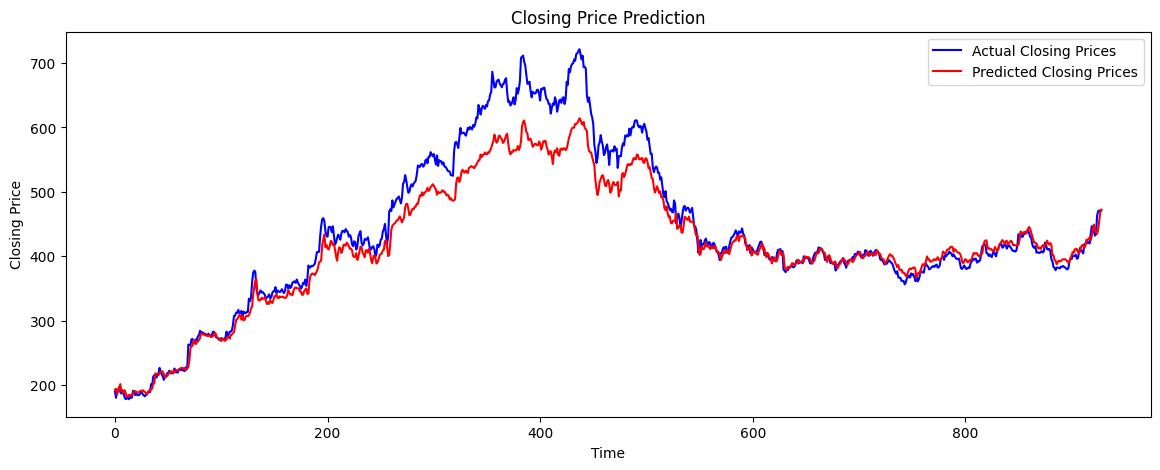

In [12]:
predictions = model.predict(X_test)
predictions = scaler_close.inverse_transform(predictions)

# Inverse transform y_test for comparison
y_test = scaler_close.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Closing Prices')
plt.plot(predictions, color='red', label='Predicted Closing Prices')
plt.title('Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [391]:
new_data = pd.read_csv('Wipro_prices_test.csv')

In [392]:
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data = new_data.drop(columns = ['Year','Month-Year','High','Low','Adj Close'])
new_data.set_index('Date', inplace=True)
new_data

,Open,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,473.000000,477.149994,10173639,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-02,478.000000,469.200012,7141257,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-03,463.899994,455.899994,9767182,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-04,457.000000,452.399994,7585168,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-05,455.049988,456.600006,8444565,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-08,457.500000,450.350006,5041443,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-09,458.000000,450.750000,7232524,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-10,451.450012,453.600006,4437338,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-11,454.950012,448.200012,4319409,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0


In [393]:
# Print the columns of the DataFrame to see what is available
print(new_data.shape)
print(data.shape)
new_data

(40, 89)
(4649, 89)


,Open,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,473.000000,477.149994,10173639,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-02,478.000000,469.200012,7141257,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-03,463.899994,455.899994,9767182,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-04,457.000000,452.399994,7585168,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-05,455.049988,456.600006,8444565,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-08,457.500000,450.350006,5041443,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-09,458.000000,450.750000,7232524,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-10,451.450012,453.600006,4437338,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-11,454.950012,448.200012,4319409,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0


In [394]:
# Check data types and missing values
print(data_scaled.dtypes)
print(data_scaled.isnull().sum())

Open                                                  float64
Close                                                 float64
Volume                                                float64
Adjustments On Amalgamation Merger Demerger Others    float64
Asset Turnover Ratio (%)                              float64
                                                       ...   
Total Share Capital                                   float64
Total Shareholders Funds                              float64
Trade Payables                                        float64
Trade Receivables                                     float64
Trade/Other Goods                                     float64
Length: 89, dtype: object
Open                                                  0
Close                                                 0
Volume                                                0
Adjustments On Amalgamation Merger Demerger Others    0
Asset Turnover Ratio (%)                              0
            

In [395]:
scaled_new_data = scaler.transform(new_data)
scaled_new_data = pd.DataFrame(scaled_new_data, columns=new_data.columns)
y_new = scaled_new_data['Close']

In [396]:
sequence_length = 5  # This should be the same as used in training

def create_sequences_for_prediction(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length]
        sequences.append(sequence)  # Append just the sequence, no labels
    return sequences
    
# Convert sequences to the format required by your model
sequences_new = create_sequences_for_prediction(pd.DataFrame(scaled_new_data, columns=data_scaled.columns), sequence_length)
sequences_y = create_sequences_for_prediction(pd.Series(y_new), sequence_length)
X_new = np.array([seq.values for seq in sequences_new])  # Convert list of DataFrames to a 3D numpy array

# Reshape X_new to be 3-dimensional (if necessary, depending on model input requirements)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], X_new.shape[2]))
predicted_values = model.predict(X_new)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [397]:
sequences_y[0][1]

0.6269393440108916

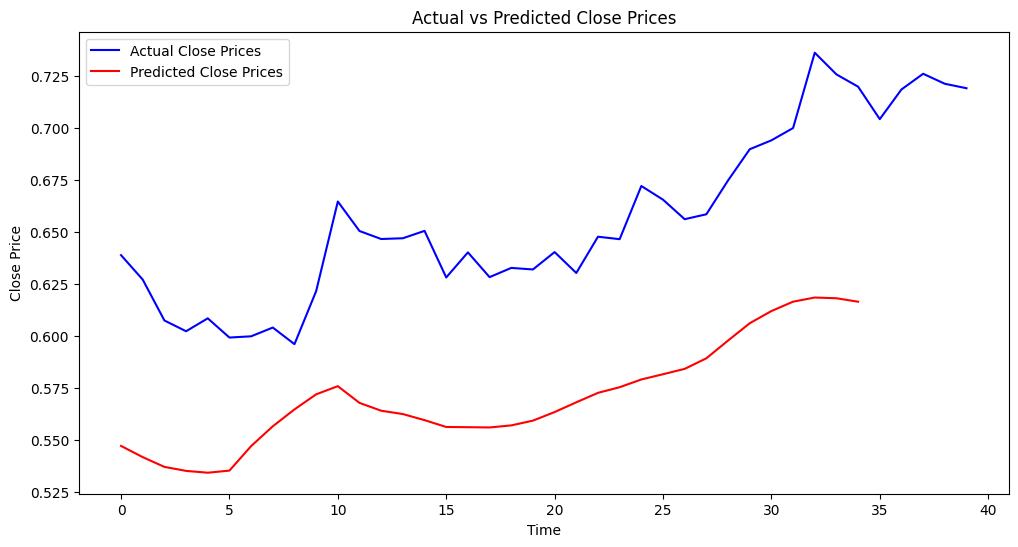

(40,)

In [398]:

dates = pd.date_range(start='2024-01-01', periods=len(predicted_close_prices))  # Replace with actual dates

# Convert predictions to a suitable format if necessary

# Rescale the predicted close prices back to the original scale
plt.figure(figsize=(12, 6))
plt.plot(scaled_new_data['Close'], color='blue', label='Actual Close Prices')
plt.plot(predicted_values, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
y_new.shape

In [115]:
actual_close_prices = new_data['Close'][sequence_length:].values

In [116]:
actual_close_prices.shape

(35,)